In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/european_forest_data.csv')

# Filter for only needed columns
relevant_columns = ['Country Name', '2019', '2020', '2021', '2022', '2023']

filtered_df = df[relevant_columns]
filtered_df.head()


,Country Name,2019,2020,2021,2022,2023
0,Albania,28.791971,28.791971,28.791971,28.791971,NaN
1,Andorra,34.042553,34.042553,34.042553,34.042553,NaN
2,Armenia,11.544784,11.537408,11.530032,11.522655,NaN
3,Austria,47.103732,47.137906,47.172079,47.206132,NaN
4,Azerbaijan,13.553367,13.694190,13.832991,13.972482,NaN


In [133]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 49 rows, 6 columns


In [134]:
# Get the distinct countries
distinct_countries_count = filtered_df['Country Name'].nunique()
distinct_countries = filtered_df['Country Name'].unique()
distinct_countries_sorted = filtered_df.sort_values(by='Country Name', ascending = True)

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries_sorted}')



There are 49 in the dataset
Countries:               Country Name       2019       2020       2021       2022  2023
0                  Albania  28.791971  28.791971  28.791971  28.791971   NaN
1                  Andorra  34.042553  34.042553  34.042553  34.042553   NaN
2                  Armenia  11.544784  11.537408  11.530032  11.522655   NaN
3                  Austria  47.103732  47.137906  47.172079  47.206132   NaN
4               Azerbaijan  13.553367  13.694190  13.832991  13.972482   NaN
8                  Belarus  43.126155  43.194403  43.272235  43.335140   NaN
5                  Belgium  22.604447  22.604447  22.604447  22.604447   NaN
7   Bosnia and Herzegovina  42.732617  42.732617  42.732617  42.732617   NaN
6                 Bulgaria  35.740604  35.860354  35.980103  36.099853   NaN
20                 Croatia  34.604567  34.651716  34.696390  34.741065   NaN
10                  Cyprus  18.674242  18.672078  18.669913  18.667749   NaN
12                 Denmark  15.687500

In [135]:
filtered_df.describe()

,2019,2020,2021,2022,2023
count,48.000000,48.000000,48.000000,48.000000,0.0
mean,31.237168,31.290211,31.315451,31.342295,NaN
std,17.580729,17.575229,17.569860,17.564063,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.702048,16.709815,16.717581,16.725348,NaN
50%,32.100720,32.363372,32.456079,32.535649,NaN
75%,40.196096,40.196096,40.196096,40.196096,NaN
max,73.730793,73.728367,73.726500,73.726500,NaN


Country Name     0
2019             1
2020             1
2021             1
2022             1
2023            49
dtype: int64

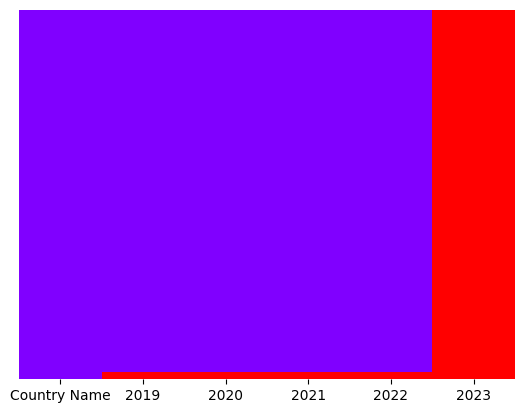

In [33]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [6]:
# Drop rows for Kosovo
countries_to_drop = ['Kosovo']

filtered_df_w_dropped_countries = filtered_df[~filtered_df['Country Name'].isin(countries_to_drop)]
filtered_df_w_dropped_countries.tail()


,Country Name,2019,2020,2021,2022,2023
43,Slovak Republic,40.056156,40.056156,40.056156,40.056156,NaN
44,Slovenia,61.573072,61.472259,61.371114,61.270192,NaN
45,Sweden,68.699666,68.699666,68.699666,68.699666,NaN
46,Turkiye,28.668789,28.871484,29.074179,29.276873,NaN
47,Ukraine,16.713842,16.724197,16.734553,16.744909,NaN


In [7]:
# Drop rows for 2023 (TO DO add prediction later)
years_to_drop = ['2023']

filtered_df_w_dropped_countries = filtered_df_w_dropped_countries.drop('2023', axis=1)
filtered_df_w_dropped_countries.head()


,Country Name,2019,2020,2021,2022
0,Albania,28.791971,28.791971,28.791971,28.791971
1,Andorra,34.042553,34.042553,34.042553,34.042553
2,Armenia,11.544784,11.537408,11.530032,11.522655
3,Austria,47.103732,47.137906,47.172079,47.206132
4,Azerbaijan,13.553367,13.694190,13.832991,13.972482


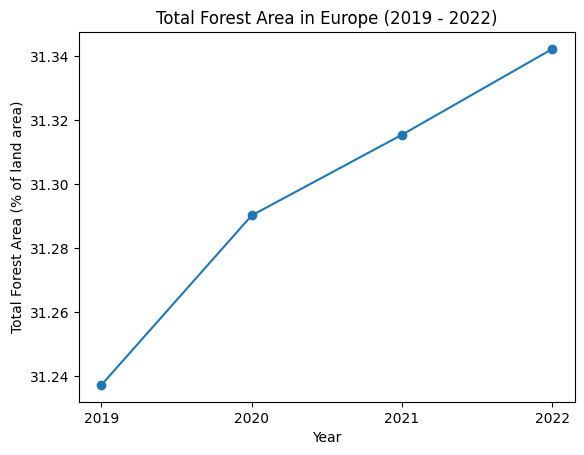

In [11]:
# TREND ANALYSIS OVER TIME - FOREST AREA OVER THE YEARS
years = ['2019','2020','2021','2022']

yearly_total_forest_area = filtered_df_w_dropped_countries[years].mean(axis=0)
plt.plot(yearly_total_forest_area.index, yearly_total_forest_area.values, marker='o')
plt.title('Total Forest Area in Europe (2019 - 2022)')
plt.xlabel('Year')
plt.ylabel('Total Forest Area (% of land area)')
plt.show()


              Country Name       2019       2020       2021       2022  \
15                 Finland  73.730793  73.728367  73.726500  73.726500   
45                  Sweden  68.699666  68.699666  68.699666  68.699666   
34              Montenegro  61.486989  61.486989  61.486989  61.486989   
44                Slovenia  61.573072  61.472259  61.371114  61.270192   
14                 Estonia  57.038596  57.038596  57.038596  57.065294   
29                  Latvia  54.749867  54.809417  54.871605  54.933794   
40      Russian Federation  49.784336  49.784336  49.784336  49.784336   
3                  Austria  47.103732  47.137906  47.172079  47.206132   
8                  Belarus  43.126155  43.194403  43.272235  43.335140   
7   Bosnia and Herzegovina  42.732617  42.732617  42.732617  42.732617   

         mean  
15  73.728040  
45  68.699666  
34  61.486989  
44  61.421659  
14  57.045271  
29  54.841171  
40  49.784336  
3   47.154962  
8   43.231983  
7   42.732617  


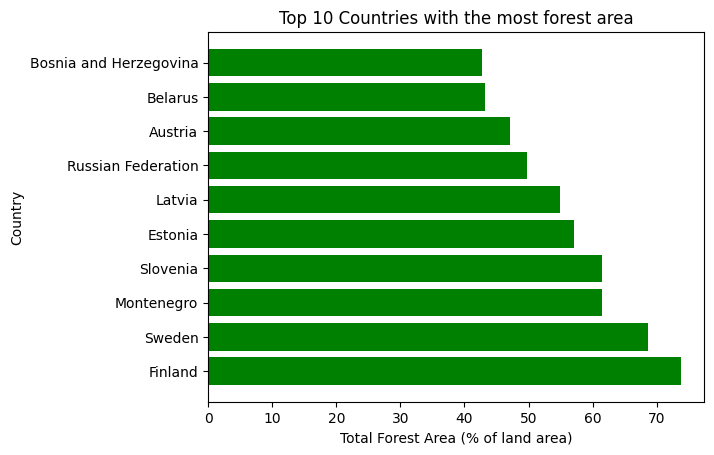

In [141]:
# TOP COUNTRIES WITH THE MOST FOREST AREA

# Find mean value for every country
filtered_df_w_dropped_countries['mean'] = filtered_df_w_dropped_countries.mean(axis=1,numeric_only=True)

# Sort countries by forest area (DESC)
top_countries = filtered_df_w_dropped_countries.sort_values(by='mean', ascending=False)

# Display
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country Name'][:10], top_countries['mean'][:10], color='green')
plt.title('Top 10 Countries with the most forest area')
plt.xlabel('Total Forest Area (% of land area)')
plt.ylabel('Country')
plt.show()



      Country Name       2019       2020       2021       2022       mean
30          Monaco   0.000000   0.000000   0.000000   0.000000   0.000000
23         Iceland   0.502727   0.509273   0.515720   0.522265   0.512496
25      Kazakhstan   1.268822   1.279653   1.290484   1.301315   1.285069
33           Malta   1.437500   1.437500   1.437500   1.437500   1.437500
35     Netherlands  10.946540  10.974161  11.001981  11.029667  10.988087
22         Ireland  11.293657  11.351720  11.409784  11.467847  11.380752
2          Armenia  11.544784  11.537408  11.530032  11.522655  11.533720
31         Moldova  11.752757  11.753222  11.722778  11.751292  11.745012
17  United Kingdom  13.152565  13.185632  13.221455  13.255487  13.203785
4       Azerbaijan  13.553367  13.694190  13.832991  13.972482  13.763257


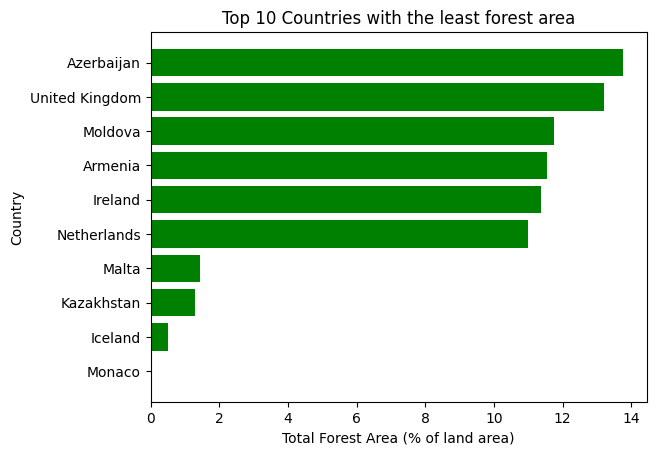

In [142]:
# TOP COUNTRIES WITH THE LEAST FOREST AREA

# Find mean value for every country
filtered_df_w_dropped_countries['mean'] = filtered_df_w_dropped_countries.mean(axis=1,numeric_only=True)

# Sort countries by forest area (ASC)
top_countries = filtered_df_w_dropped_countries.sort_values(by='mean', ascending=True)

# Display
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country Name'][:10], top_countries['mean'][:10], color='green')
plt.title('Top 10 Countries with the least forest area')
plt.xlabel('Total Forest Area (% of land area)')
plt.ylabel('Country')
plt.show()


In [30]:
# Forest area sustainability score - higher % of forest area -> better sustainability 

# Create new column and calculate the mean % of forest area per country over all years
filtered_df_w_dropped_countries['forest_avg'] = filtered_df_w_dropped_countries[years].mean(axis=1)

avg_forest_area_per_country = filtered_df_w_dropped_countries[['Country Name','forest_avg']].copy()

#  Normalize the average values (0 = worst, 1 = best)
max_val = avg_forest_area_per_country['forest_avg'].max()
min_val = avg_forest_area_per_country['forest_avg'].min()

avg_forest_area_per_country['forest_area_subindex'] = (avg_forest_area_per_country['forest_avg'] - min_val) / (max_val - min_val)

# Sort 
avg_forest_area_per_country.sort_values(by='forest_area_subindex', ascending=False)



,Country Name,forest_avg,forest_area_subindex
15,Finland,73.728040,1.000000
45,Sweden,68.699666,0.931798
34,Montenegro,61.486989,0.833970
44,Slovenia,61.421659,0.833084
14,Estonia,57.045271,0.773726
29,Latvia,54.841171,0.743831
40,Russian Federation,49.784336,0.675243
3,Austria,47.154962,0.639580
8,Belarus,43.231983,0.586371
7,Bosnia and Herzegovina,42.732617,0.579598


In [29]:
avg_forest_area_per_country.to_csv('../data_subindex/subindex_forest_ares_2019-2022.csv', index=False)

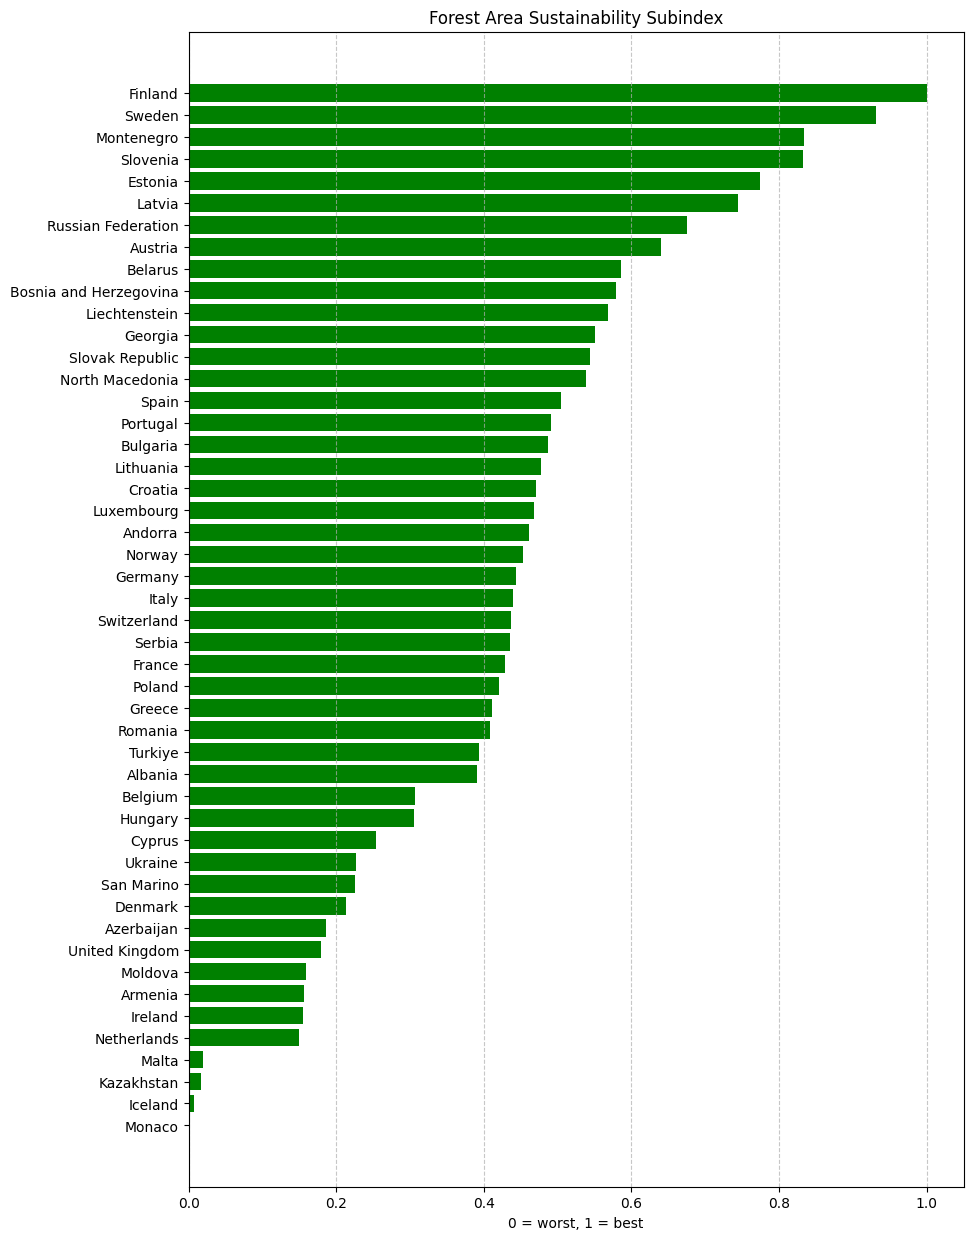

In [32]:
# Plot

avg_forest_area_per_country = avg_forest_area_per_country.sort_values(by='forest_area_subindex')

plt.figure(figsize=(10,15))
plt.barh(avg_forest_area_per_country['Country Name'],avg_forest_area_per_country['forest_area_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('Forest Area Sustainability Subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()